In [52]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

# Unit Length

Apply the calculator in Ref[1], we can roughly get to know the approxiamte distance for one degree in terms of new york position.

In [126]:
# km/degree as our unit
unit_lat = 111.047
unit_long = 31.194

airports = ["JFK", "Newark", "LaGuardia"]
# lat long area(km^2)
airinfo = {"JFK" : [40.639722, -73.778889, 19.951],
          "Newark": [40.6925, -74.168611, 0.275186],
          "LaGuardia": [40.77725, -73.872611, 2.75186]}

# Box Range for Taxi

In [127]:
for name in airports:
    # lat
    delta_lat = np.sqrt(airinfo[name][2])/unit_lat
    print(name, "latitude range")
    print(airinfo[name][0]-delta_lat, airinfo[name][0]+delta_lat)
    # long
    delta_long = np.sqrt(airinfo[name][2])/unit_long
    print(name, "longitude range")
    print(airinfo[name][1]-delta_long, airinfo[name][1]+delta_long)

JFK latitude range
40.5994989032 40.6799450968
JFK longitude range
-73.922078531 -73.635699469
Newark latitude range
40.6877760386 40.6972239614
Newark longitude range
-74.1854277512 -74.1517942488
LaGuardia latitude range
40.7623115225 40.7921884775
LaGuardia longitude range
-73.9257902368 -73.8194317632


# Estimation Data

In [128]:
df1 = pd.read_csv("JFK.csv")
df2 = pd.read_csv("Newark.csv")
df3 = pd.read_csv("LaGuardia.csv")

In [130]:
df1["airport"] = "JFK"
df2["airport"] = "Newark"
df3["airport"] = "LaGuardia"

In [159]:
df = pd.concat([df1, df2, df3]).sort_values(["year", "airport", "platform"]).reset_index(drop = True)
df.to_csv(file_name, sep='\t')
df.head()

,year,cnt,platform,airport
0,2009,5797987.0,yellow,JFK
1,2009,10341109.0,yellow,LaGuardia
2,2009,320166.0,yellow,Newark
3,2010,5896736.0,yellow,JFK
4,2010,10278304.0,yellow,LaGuardia


In [160]:
df.loc[df["airport"] == "JFK"]

,year,cnt,platform,airport
0,2009,5797987.0,yellow,JFK
3,2010,5896736.0,yellow,JFK
6,2011,6578320.0,yellow,JFK
9,2012,7166065.0,yellow,JFK
12,2013,33204.0,green,JFK
13,2013,7485037.0,yellow,JFK
18,2014,489123.0,green,JFK
19,2014,7579101.0,yellow,JFK
24,2015,762931.0,fhv,JFK
25,2015,707701.0,green,JFK


# Market Share

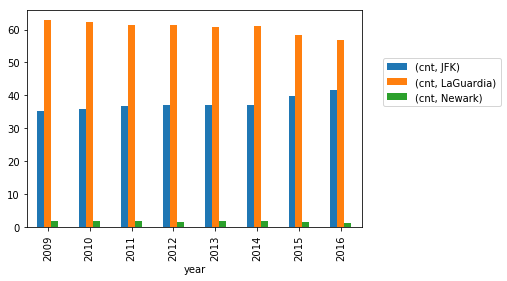

In [189]:
year_sum1 = df.groupby(['year', 'airport']).agg({'cnt': 'sum'})
year_pcts1 = year_sum1.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
year_pcts1.unstack().plot(kind = "bar").legend(bbox_to_anchor=(1.05, 0.8))

# Taxi Market Share at Airport

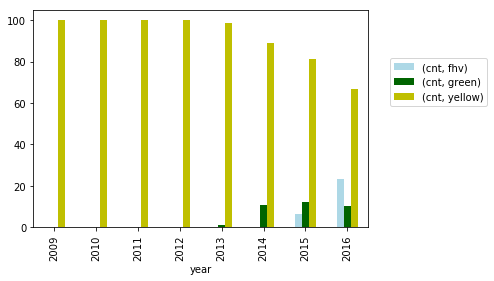

In [182]:
year_sum2 = df.groupby(['year', 'platform']).agg({'cnt': 'sum'})
year_pcts2 = year_sum2.groupby(level=0).apply(lambda x:
                                                 100 * x / float(x.sum()))
year_pcts2.unstack().plot(kind = "bar", color=["lightblue","darkgreen","y"]).legend(bbox_to_anchor=(1.05, 0.8))

# Reference

1. https://msi.nga.mil/MSISiteContent/StaticFiles/Calculators/degree.html